# Aim:

The basic idea of analyzing the Zomato dataset is to get a fair idea about the factors affecting the establishment of different types of restaurants at different places in Bengaluru, the aggregate rating of each restaurant, Bengaluru being one such city has more than 12,000 restaurants with restaurants serving dishes from all over the world. With each day new restaurants open the industry hasn't been saturated yet and the demand is increasing day by day. In spite of increasing demand, it however has become difficult for new restaurants to compete with established restaurants. Most of them serve the same food. Bengaluru is the IT capital of India. Most of the people here are dependent mainly on the restaurant food as they don’t have time to cook for themselves.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

DATA DICTIONARY:


• Restaurant Id: Unique id of every restaurant across various cities of the world

• Restaurant Name: Name of the restaurant

• Country Code: Country in which restaurant is located

• City: City in which the restaurant is located

• Address: Address of the restaurant

• Locality: Location in the city

• Locality Verbose: Detailed description of the locality

• Longitude: Longitude coordinate of the restaurant's location

• Latitude: Latitude coordinate of the restaurant's location

• Cuisines: Cuisines offered by the restaurant

• Average Cost for two: Cost for two people in different currencies 

• Currency: Currency of the country

• Has Table booking: yes/no

• Has Online delivery: yes/ no


In [4]:
df = pd.read_csv('Zomoto.CSV')
df.head()

,Unnamed: 0,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,14221,https://www.zomato.com/bangalore/shree-ranga-v...,"366, Hosur Main Road, Attibele, Anekal Taluk, ...",Shree Ranga Vilas,No,No,3.2/5,7,080 29765044,Electronic City,Casual Dining,NaN,"North Indian, South Indian, Chinese, Juices",500,"[('Rated 3.0', 'RATED\n Typical South Indian ...",[],Dine-out,Electronic City
1,43422,https://www.zomato.com/bangalore/sphyre-gatewa...,"Gateway Hotel, 66, Residency Road, Bangalore",Sphyre - Gateway Hotel,No,No,3.6 /5,45,+91 9886643495\n+91 9898780004,Residency Road,Lounge,NaN,Finger Food,"1,700","[('Rated 1.0', 'RATED\n Expected a good night...",[],Dine-out,MG Road
2,16032,https://www.zomato.com/bangalore/popular-baker...,"19, BDA Complex, HSR, Bangalore",Popular Bakery,No,No,3.7/5,36,+91 8105834605\r\n080 25722488,HSR,"Dessert Parlor, Bakery",NaN,"Desserts, Bakery",600,"[('Rated 5.0', ""RATED\n This outlet is in HSR...",[],Delivery,HSR
3,51635,https://www.zomato.com/bangalore/thai-chinese-...,"7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...",Thai & Chinese Fast Food,No,No,3.4 /5,7,+91 9206260085\n+91 7619416923,KR Puram,Quick Bites,NaN,"Chinese, Thai",400,"[('Rated 5.0', 'RATED\n Its Looking delicious...",[],Dine-out,Whitefield
4,23424,https://www.zomato.com/bangalore/grill-on-whee...,"Kothanuru Main Road, Puttenahalli Road, Natara...",Grill On Wheels,No,No,NEW,0,+91 9901979901,JP Nagar,Quick Bites,NaN,"North Indian, Chinese, BBQ, Arabian, Fast Food",400,[],[],Dine-out,JP Nagar


In [8]:
# 2.	Which are the top restaurant chains based on the distribution(frequency) in Bangaluru?
df['name'].value_counts().head(15)

Cafe Coffee Day              18
Keventers                    17
Onesta                       17
McDonald's                   16
SGS Non Veg - Gundu Pulav    16
The Chocolate Heaven         16
Baskin Robbins               16
Mad Over Donuts              15
Tata Cha                     15
Petoo                        15
KFC                          15
Smoor                        14
Corner House Ice Cream       14
Sweet Chariot                14
Sweet Truth                  13
Name: name, dtype: int64

In [14]:
# 3.	How many restaurants do not accept online orders?
len(df[df['online_order']=='No']['name'])

4057

In [22]:
# 4.	What is the ratio b/w restaurants that provide and do not provide table booking?
no = df['book_table'].value_counts()[0]
yes = df['book_table'].value_counts()[1]
print('Ratio b/w restaurants that provide and do not provide table booking is:',yes/No)

Ratio b/w restaurants that provide and do not provide table booking is: 0.14233493260223898


In [ ]:
# 5.	Use a boxplot on the rating column. Use User Defined Function or 
# Lambda function or Apply function to extract the data that comes before /. Kindly exclude /.

In [31]:
df['rate'].unique()

array(['3.2/5', '3.6 /5', '3.7/5', '3.4 /5', 'NEW', '4.2/5', nan,
       '3.5 /5', '4.1 /5', '3.4/5', '4.3 /5', '4.5/5', '3.0/5', '3.9/5',
       '3.0 /5', '4.0 /5', '4.2 /5', '3.5/5', '2.9 /5', '4.3/5', '4.4 /5',
       '3.8/5', '3.6/5', '3.3/5', '3.9 /5', '3.3 /5', '4.7/5', '3.1 /5',
       '-', '4.5 /5', '3.2 /5', '3.8 /5', '3.7 /5', '2.5 /5', '4.0/5',
       '4.6 /5', '4.1/5', '2.6/5', '3.1/5', '4.4/5', '2.6 /5', '2.7 /5',
       '2.9/5', '2.5/5', '2.8/5', '4.6/5', '4.7 /5', '2.8 /5', '4.8 /5',
       '4.8/5', '2.7/5', '4.9 /5', '2.2/5', '2.3 /5', '4.9/5', '2.4 /5',
       '2.3/5', '2.1 /5', '2.4/5', '2.1/5', '2.2 /5'], dtype=object)

In [35]:
df['rate'] = df['rate'].replace(np.nan, 'NaN')

# Apply the lambda function to extract the rating
df['rate_extracted'] = df['rate'].apply(lambda x: np.nan if x == 'NEW' or x == '-' else x.split('/')[0])

In [43]:
df['rate_extracted']=df['rate_extracted'].astype(float)

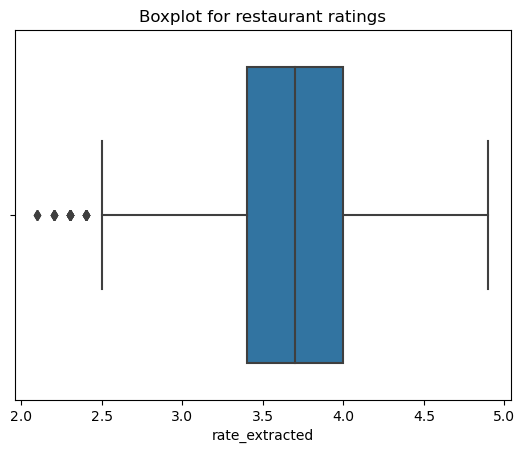

In [46]:
sns.boxplot(x='rate_extracted',data=df)
plt.title('Boxplot for restaurant ratings')
plt.show()

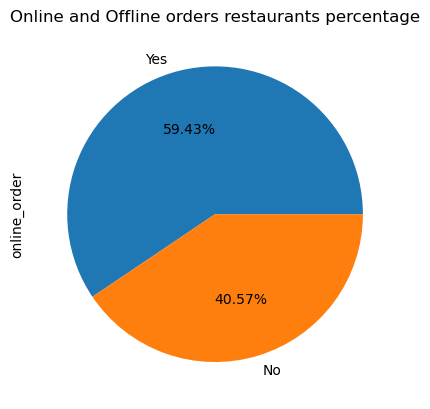

In [50]:
# 6.	Online and Offline orders restaurants percentage.
df['online_order'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title('Online and Offline orders restaurants percentage')
plt.show()

In [66]:
# Plot the scatter plot using the Cost vs rating variable with respect to online order. 
# Use apply the function Or other function to remove the “,”.
df['approx_cost(for two people)']=df['approx_cost(for two people)'].apply(lambda x: str(x).replace(',',''))

In [78]:
df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(float)

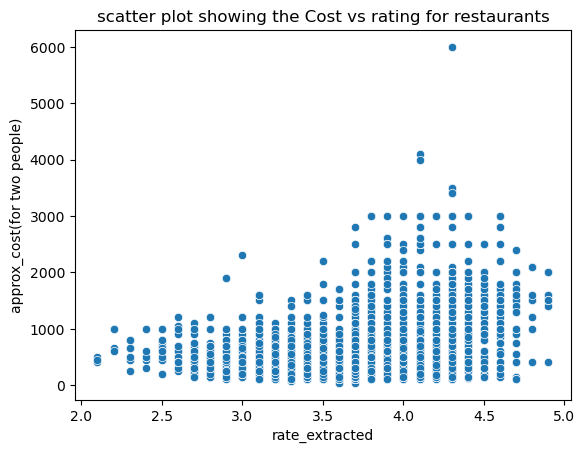

In [75]:
sns.scatterplot(data=df,y='approx_cost(for two people)',x='rate_extracted')
plt.title('scatter plot showing the Cost vs rating for restaurants')
plt.show()

approx_cost(for two people)


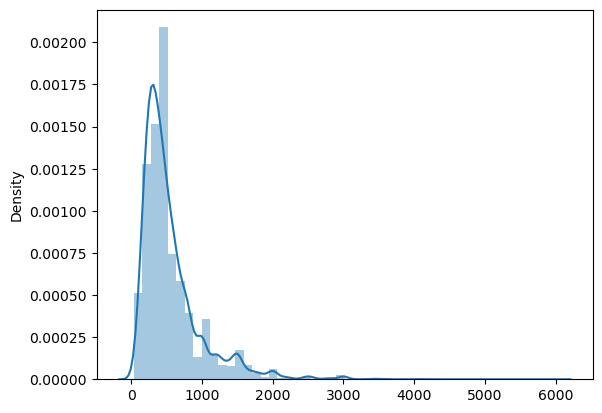

rate_extracted


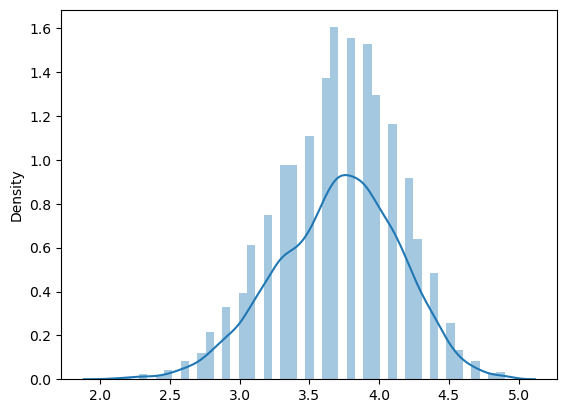

In [87]:
# 8.	Find the distribution of the votes and Approx_cost using a user-defined function and for a loop.
from warnings import filterwarnings
filterwarnings('ignore')
def distribution(data,column):
    sns.distplot(x=column.values)
    plt.show()
    
for i in ['approx_cost(for two people)','rate_extracted']:
    print(i)
    distribution(df,df[i])

In [94]:
# 9.	Which are the most common restaurant type in Banglore?
list(df['rest_type'].value_counts().head(1).index)

['Quick Bites']

In [97]:
# 10.	Is there any difference b/w the votes of restaurants accepting and not accepting online orders?
df.groupby('online_order')['votes'].sum()

online_order
No     1128442
Yes    1795484
Name: votes, dtype: int64

- Votes to restaurants accepting online orders is high.

In [111]:
# 12.	Find the Best budget Restaurants in any location.
d=df[df['location']=='Banashankari']
budget=d.groupby('name')['approx_cost(for two people)'].min()
print('Best budget Restaurants in Banashankar is:')
budget.sort_values().head()

Best budget Restaurants in Banashankar is:


name
Taaza Thindi                 100.0
Foodlieious Multi Cuisine    100.0
Coffee Bytes                 100.0
Kaumudis Juoice              150.0
Sri Sai Tiffannies           150.0
Name: approx_cost(for two people), dtype: float64

In [ ]:
# 13.	Top quick bites restaurant chains in Banglore.

In [137]:
a=df[df['rest_type']=='Quick Bites']
print('Top quick bites restaurant chains in Banglore are:')
a.name.value_counts().head()

Top quick bites restaurant chains in Banglore are:


McDonald's                   16
SGS Non Veg - Gundu Pulav    15
KFC                          15
Taco Bell                    13
Pizza Stop                   12
Name: name, dtype: int64

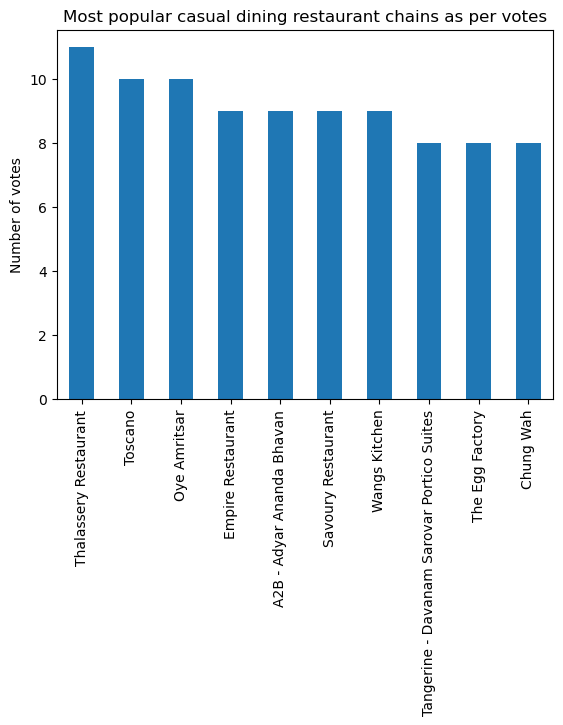

In [138]:
# 14.	Which are the most popular casual dining restaurant chains, Make use of any plot related to this question?
x=df[df['rest_type']=='Casual Dining']
y=x.name.value_counts()
y.sort_values(ascending=False).head(10).plot(kind='bar')
plt.ylabel('Number of votes')
plt.title('Most popular casual dining restaurant chains as per votes')
plt.show()

In [143]:
# 15.	Which are the most popular cuisines of Bangalore using a related plot?
df.cuisines.value_counts().head(10)

North Indian                           522
North Indian, Chinese                  451
South Indian                           363
Bakery, Desserts                       199
Biryani                                159
South Indian, North Indian, Chinese    140
Desserts                               133
Fast Food                              130
Cafe                                   127
Chinese                                117
Name: cuisines, dtype: int64